In [6]:
library(dplyr)
library(ggplot2)
library(tidyr)

In [7]:
df<- read.csv("kaggle_data_ICC_T20_WorldCup.csv.xls")
head(df)

,X,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,⋯,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
1,Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,⋯,Australia,Aiden_Markram,Right,40,111.10,SouthAfrica,119,1,Josh_Hazlewood,Australia
2,Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,⋯,England,Jos_Buttler,Right,24,109.10,England,56,1,Moeen_Ali,England
3,Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,⋯,Bangladesh,Charith_Asalanka,Left,80,163.20,Srilanka,172,1,Charith_Asalanka,Srilanka
4,Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,⋯,Pakistan,Muhammad_Rizwan,Right,79,143.60,Pakistan,152,1,Shaheen_shah,Pakistan
5,Match_5,Afghanistan,Scotland,Group_stage,Afghanistan,Batting,evening,Sharjah,33,Mujeeb_ur_Rehman,⋯,Afghanistan,Najibullah_Zadran,Left,59,173.53,Afghanistan,191,0,Mujeeb_ur_Rehman,Afghanistan
6,Match_6,SouthAfrica,Windies,Group_stage,SouthAfrica,Fielding,afternoon,Dubai,33,Dwaine_Pretorious,⋯,SouthAfrica,Evin_Lewis,Left,56,160.00,Windies,144,1,Anrich_Nortje,SouthAfrica


In [8]:
tail(df)

,X,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,⋯,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
28,Match_28,New_Zealand,Afghanistan,Group_stage,Afghanistan,Batting,afternoon,Abu_Dhabi,29,Trent_Boult,⋯,New_Zealand,Najibullah_Zadran,Left,73,152.08,Afghanistan,125,1,Trent_Boult,New_Zealand
29,Match_29,Pakistan,ScotLand,Group_stage,Pakistan,Batting,evening,Sharjah,27,Shadab_Khan,⋯,Pakistan,Babar_Azam,Right,66,140.43,Pakistan,190,0,Shoaib_Malik,Pakistan
30,Match_30,India,Namibia,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,Rohit_Sharma,Right,56,151.35,India,133,1,Ravindra_Jadeja,India
31,Match_31,New_Zealand,England,Semi_Final,New_Zealand,Fielding,evening,Abu_Dhabi,28,Liam_Livingstone,⋯,England,Daryl_Mitchell,Right,72,153.19,New_Zealand,167,1,Daryl_Mitchell,New_Zealand
32,Match_32,Australia,Pakistan,Semi_Final,Australia,Fielding,evening,Dubai,29,Shadab_Khan,⋯,Pakistan,Muhammad_Rizwan,Right,67,128.85,Pakistan,177,1,Matthew_Wade,Australia
33,Match_33,Australia,New_Zealand,Final,Australia,Fielding,evening,Dubai,26,Josh_Hazlewood,⋯,Australia,Kane_Williamson,Right,85,177.08,New_Zealand,173,1,Mitchell_Marsh,Australia


In [9]:
str(df)

'data.frame':	33 obs. of  24 variables:
 $ X                      : chr  "Match_1" "Match_2" "Match_3" "Match_4" ...
 $ team_1                 : chr  "Australia" "England" "Srilanka" "Pakistan" ...
 $ team_2                 : chr  "SouthAfrica" "Windies" "Bangladesh" "India" ...
 $ stage                  : chr  "Group_stage" "Group_stage" "Group_stage" "Group_stage" ...
 $ Winner_toss            : chr  "Australia" "England" "Srilanka" "Pakistan" ...
 $ Toss_descision         : chr  "Fielding" "Fielding" "Fielding" "Fielding" ...
 $ time                   : chr  "afternoon" "evening" "afternoon" "evening" ...
 $ venue                  : chr  "Abu_Dhabi" "Dubai" "Sharjah" "Dubai" ...
 $ avg_temperature        : int  30 33 34 34 33 33 29 30 29 28 ...
 $ best_bowler            : chr  "Josh_Hazlewood" "Adil_Rashid" "Shakib_al_Hassan" "Shaheen_shah" ...
 $ bowling_arm            : chr  "Right" "Right" "Left" "Left" ...
 $ bowling_style          : chr  "Pacer" "Leg_spin" "Off_spin" "Pacer" ..

In [10]:
summary(df)

      X                team_1             team_2             stage          
 Length:33          Length:33          Length:33          Length:33         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Winner_toss        Toss_descision         time              venue          
 Length:33          Length:33          Length:33          Length:33         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [11]:
dim(df)

[1] 33 24

In [12]:
unique(df$best_batter)

[1] "Aiden_Markram"         "Jos_Buttler"           "Charith_Asalanka"     
 [4] "Muhammad_Rizwan"       "Najibullah_Zadran"     "Evin_Lewis"           
 [7] "Jason_Roy"             "Michael_Leask"         "David_Warner"         
[10] "Liton_Das"             "Babar_Azam"            "Pathum_Nissanka"      
[13] "Mohammad_Shahzad"      "Daryl_Mitchell"        "Temaba_Bavuma"        
[16] "Martin_Guptill"        "Rohit_Sharma"          "Aaron_Finch"          
[19] "Shimron_Hetmyer"       "Glenn_Phillips"        "KL_Rahul"             
[22] "Rassie van der Dussen" "Kane_Williamson"

In [13]:
unique(df$bowling_style)

[1] "Pacer"      "Leg_spin"   "Off_spin"   "Orthodox"   "Unorthodox"

In [14]:
max(unique(df$best_bowler))

[1] "Wanindu_Hasaranga"

In [15]:
subset(df, df$best_bowler=="Wanindu_Hasaranga")

,X,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,⋯,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
17,Match_17,England,Srilanka,Group_stage,Srilanka,Fielding,evening,Sharjah,28,Wanindu_Hasaranga,⋯,Srilanka,Jos_Buttler,Right,101,150.75,England,164,0,Jos_Buttler,England
23,Match_23,Srilanka,Windies,Group_stage,Windies,Fielding,evening,Abu_Dhabi,28,Wanindu_Hasaranga,⋯,Srilanka,Shimron_Hetmyer,Left,81,150.00,Windies,190,0,Chrith_Adalanka,Srilanka


In [16]:
subset(df, df$team_1=="India")

,X,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,⋯,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
21,Match_21,India,Afghanistan,Group_stage,Afghanistan,Fielding,evening,Abu_Dhabi,29,Mohammed Shami,⋯,India,Rohit_Sharma,Right,74,157.45,India,211,0,Rohit_Sharma,India
25,Match_25,India,ScotLand,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,KL_Rahul,Right,50,263.16,India,86,1,Ravindra_Jadeja,India
30,Match_30,India,Namibia,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,Rohit_Sharma,Right,56,151.35,India,133,1,Ravindra_Jadeja,India


In [17]:
df$most_individual_wickets[df$best_bowler=="Wanindu_Hasaranga"]

[1] 3 2

In [18]:
colnames(df)

[1] "X"                       "team_1"                 
 [3] "team_2"                  "stage"                  
 [5] "Winner_toss"             "Toss_descision"         
 [7] "time"                    "venue"                  
 [9] "avg_temperature"         "best_bowler"            
[11] "bowling_arm"             "bowling_style"          
[13] "most_individual_wickets" "economy"                
[15] "best_bowler_country"     "best_batter"            
[17] "batting_hand"            "high_indvidual_scores"  
[19] "strike_rate"             "best_batter_team"       
[21] "target"                  "target_achieved"        
[23] "Player_of_the_match"     "Winner"

In [19]:
unique(df$stage)

[1] "Group_stage" "Semi_Final"  "Final"

In [20]:
sum(is.na(df))

[1] 0

In [21]:
sum(is.na(df$best_batter_team))

[1] 0

In [22]:
unique(df$team_1)

[1] "Australia"   "England"     "Srilanka"    "Pakistan"    "Afghanistan"
 [6] "SouthAfrica" "Namibia"     "Windies"     "New_Zealand" "India"

In [23]:
unique(df$team_2)

[1] "SouthAfrica" "Windies"     "Bangladesh"  "India"       "Scotland"   
 [6] "New_Zealand" "ScotLand"    "Srilanka"    "Afghanistan" "Australia"  
[11] "Namibia"     "England"     "Pakistan"

# **PERFORMANCE STATISTICS FOR INDIA VS NAMIBIA**

In [24]:
df$best_batter[df$team_1=="India" ]

[1] "Rohit_Sharma" "KL_Rahul"     "Rohit_Sharma"

In [25]:
df$best_bowler[df$team_1=="India"]

[1] "Mohammed Shami"  "Ravindra_Jadeja" "Ravindra_Jadeja"

In [26]:
df$high_indvidual_scores[df$team_1=="India"]

[1] 74 50 56

In [27]:
max(df$high_indvidual_scores[df$team_1=="India"])

[1] 74

In [28]:
df$best_batter[df$best_batter_team=="India" & df$high_indvidual_scores==74]

[1] "Rohit_Sharma"

In [29]:
df$target[df$team_1=="India"]

[1] 211  86 133

In [30]:
max(df$target[df$team_1=="India"])

[1] 211

In [31]:
india= subset(df, df$team_1=="India")
india

,X,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,⋯,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
21,Match_21,India,Afghanistan,Group_stage,Afghanistan,Fielding,evening,Abu_Dhabi,29,Mohammed Shami,⋯,India,Rohit_Sharma,Right,74,157.45,India,211,0,Rohit_Sharma,India
25,Match_25,India,ScotLand,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,KL_Rahul,Right,50,263.16,India,86,1,Ravindra_Jadeja,India
30,Match_30,India,Namibia,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,Rohit_Sharma,Right,56,151.35,India,133,1,Ravindra_Jadeja,India


In [32]:
india$best_bowler[1]="Ravindra_Jadeja"
india$best_bowler[2]= "Mohhamed Shami"

In [33]:
india

,X,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,⋯,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
21,Match_21,India,Afghanistan,Group_stage,Afghanistan,Fielding,evening,Abu_Dhabi,29,Ravindra_Jadeja,⋯,India,Rohit_Sharma,Right,74,157.45,India,211,0,Rohit_Sharma,India
25,Match_25,India,ScotLand,Group_stage,India,Fielding,evening,Dubai,28,Mohhamed Shami,⋯,India,KL_Rahul,Right,50,263.16,India,86,1,Ravindra_Jadeja,India
30,Match_30,India,Namibia,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,Rohit_Sharma,Right,56,151.35,India,133,1,Ravindra_Jadeja,India


In [34]:
india$team_2[india$team_1=="India" & india$target==133]

[1] "Namibia"

In [35]:
india$Winner_toss[india$team_1=="India" & india$team_2=="Namibia"]

[1] "India"

In [36]:
india$Toss_descision[india$team_1=="India" & india$team_2=="Namibia" & india$Winner_toss=="India"]

[1] "Fielding"

In [37]:
india$best_batter[india$team_2=="Namibia" ]

[1] "Rohit_Sharma"

In [38]:
india$best_bowler[india$team_2=="Namibia" ]

[1] "Ravindra_Jadeja"

In [39]:
india$high_indvidual_scores[india$team_2=="Namibia"]

[1] 56

In [40]:
india$best_batter[india$team_2=="Namibia" & india$high_indvidual_scores==56]

[1] "Rohit_Sharma"

In [41]:
india$target[india$team_2=="Namibia"]

[1] 133

In [42]:
india$avg_temperature[india$team_1=="India" & india$team_2=="Namibia"]

[1] 28

In [43]:
india$venue[india$team_1=="India" & india$target==133]

[1] "Dubai"

In [44]:
india$best_batter[india$team_1=="India" & india$team_2=="Namibia"]

[1] "Rohit_Sharma"

In [45]:
india$strike_rate[india$team_1=="India" & india$team_2=="Namibia" & india$best_batter=="Rohit_Sharma"]

[1] 151.35

In [46]:
india$best_bowler[india$team_1=="India" & india$team_2=="Namibia"]

[1] "Ravindra_Jadeja"

In [47]:
india$economy[india$team_1=="India" & india$team_2=="Namibia" & india$best_bowler=="Ravindra_Jadeja"]

[1] 4

In [48]:
india$high_indvidual_scores[india$team_1=="India" & india$team_2=="Namibia" & india$best_batter=="Rohit_Sharma"]

[1] 56

In [49]:
india$most_individual_wickets[india$team_1=="India" & india$team_2=="Namibia" & india$best_bowler=="Ravindra_Jadeja"]

[1] 3

In [50]:
india$best_bowler[india$team_1=="India"]

[1] "Ravindra_Jadeja" "Mohhamed Shami"  "Ravindra_Jadeja"

In [51]:
india$most_individual_wickets[india$team_1=="India" & india$team_2=="Namibia" & india$best_bowler=="Ravindra_Jadeja"]

[1] 3

In [52]:
india$Player_of_the_match[india$team_1=="India" & india$team_2=="Namibia"]

[1] "Ravindra_Jadeja"

In [53]:
india$venue[india$team_1=="India" & india$team_2=="Namibia"]

[1] "Dubai"

In [54]:
india$Winner[india$team_1=="India" & india$team_2=="Namibia"]

[1] "India"

# **PERFORMANCE STATISTICS OF INDIA VS AFGHANISTAN**

In [55]:
df$best_batter[df$team_1=="India" ]

[1] "Rohit_Sharma" "KL_Rahul"     "Rohit_Sharma"

In [56]:
df$best_bowler[df$team_1=="India"]

[1] "Mohammed Shami"  "Ravindra_Jadeja" "Ravindra_Jadeja"

In [57]:
df$high_indvidual_scores[df$team_1=="India"]

[1] 74 50 56

In [58]:
max(df$high_indvidual_scores[df$team_1=="India"])

[1] 74

In [59]:
df$best_batter[df$best_batter_team=="India" & df$high_indvidual_scores==74]

[1] "Rohit_Sharma"

In [60]:
df$target[df$team_1=="India"]

[1] 211  86 133

In [61]:
max(df$target[df$team_1=="India"])

[1] 211

In [62]:
ind= subset(df, df$team_1=="India")
ind

,X,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,⋯,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
21,Match_21,India,Afghanistan,Group_stage,Afghanistan,Fielding,evening,Abu_Dhabi,29,Mohammed Shami,⋯,India,Rohit_Sharma,Right,74,157.45,India,211,0,Rohit_Sharma,India
25,Match_25,India,ScotLand,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,KL_Rahul,Right,50,263.16,India,86,1,Ravindra_Jadeja,India
30,Match_30,India,Namibia,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,Rohit_Sharma,Right,56,151.35,India,133,1,Ravindra_Jadeja,India


In [63]:
ind$best_bowler[1]="Ravindra_Jadeja"
ind$best_bowler[2]= "Mohammed Shami"

In [64]:
ind

,X,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,⋯,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
21,Match_21,India,Afghanistan,Group_stage,Afghanistan,Fielding,evening,Abu_Dhabi,29,Ravindra_Jadeja,⋯,India,Rohit_Sharma,Right,74,157.45,India,211,0,Rohit_Sharma,India
25,Match_25,India,ScotLand,Group_stage,India,Fielding,evening,Dubai,28,Mohammed Shami,⋯,India,KL_Rahul,Right,50,263.16,India,86,1,Ravindra_Jadeja,India
30,Match_30,India,Namibia,Group_stage,India,Fielding,evening,Dubai,28,Ravindra_Jadeja,⋯,India,Rohit_Sharma,Right,56,151.35,India,133,1,Ravindra_Jadeja,India


In [65]:
ind$team_2[ind$team_1=="India" & ind$target==211]

[1] "Afghanistan"

In [66]:
ind$Winner_toss[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] "Afghanistan"

In [67]:
ind$Toss_descision[ind$Winner_toss=="India"]

[1] "Fielding" "Fielding"

In [68]:
ind$avg_temperature[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] 29

In [69]:
ind$Toss_descision[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] "Fielding"

In [70]:
ind$venue[ind$team_1=="India" & ind$target==211]

[1] "Abu_Dhabi"

In [71]:
ind$Winner[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] "India"

In [72]:
ind$Winner[ind$team_1=="India"]

[1] "India" "India" "India"

In [73]:
ind$economy[ind$team_1=="India"]

[1] 8.00 3.75 4.00

In [74]:
min(ind$economy[ind$team_1=="India"])

[1] 3.75

In [75]:
ind$best_bowler[ind$team_1=="India" & ind$economy==8]

[1] "Ravindra_Jadeja"

In [76]:
ind$best_bowler[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] "Ravindra_Jadeja"

In [77]:
ind$best_batter[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] "Rohit_Sharma"

In [78]:
ind$high_indvidual_scores[ind$team_1=="India" & ind$team_2=="Afghanistan" & ind$best_batter=="Rohit_Sharma"]

[1] 74

In [79]:
ind$most_individual_wickets[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] 3

In [80]:
ind$best_bowler[ind$team_1=="India" & ind$team_2=="Afghanistan" & ind$most_individual_wickets==3]

[1] "Ravindra_Jadeja"

In [81]:
ind$strike_rate[ind$team_1=="India" & ind$team_2=="Afghanistan" & ind$best_batter=="Rohit_Sharma"]

[1] 157.45

In [82]:
ind$economy[ind$team_1=="India" & ind$team_2=="Afghanistan" & ind$best_bowler=="Ravindra_Jadeja"]

[1] 8

In [83]:
ind$Player_of_the_match[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] "Rohit_Sharma"

In [84]:
ind$Winner[ind$team_1=="India" & ind$team_2=="Afghanistan"]

[1] "India"

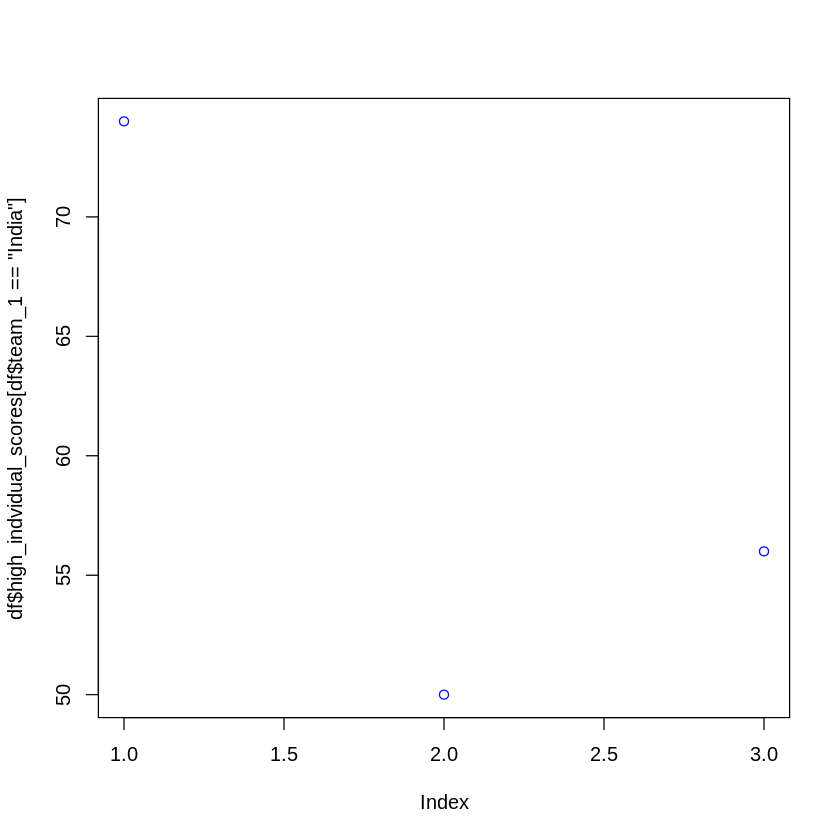

In [86]:
plot(df$high_indvidual_scores[df$team_1=="India"], col="Blue")